In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
import fastf1.legacy
import fastf1 as ff1
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import matplotlib as mpl
colormap = mpl.cm.plasma

In [2]:
year = 2023
gp = 'Singapore'
event = 'race'

session_event = ff1.get_session(year, gp, event)
session_event.load()

req         WARNING 	DEFAULT CACHE ENABLED! (47.3 MB) /Users/kendallfoy/Library/Caches/fastf1
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.2.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching trac

In [9]:
circuit_info = session_event.get_circuit_info()
lap = session_event.laps.pick_fastest()
pos = lap.get_pos_data()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fastf1/core.py:478: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged[col].update(data[col])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fastf1/core.py:478: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

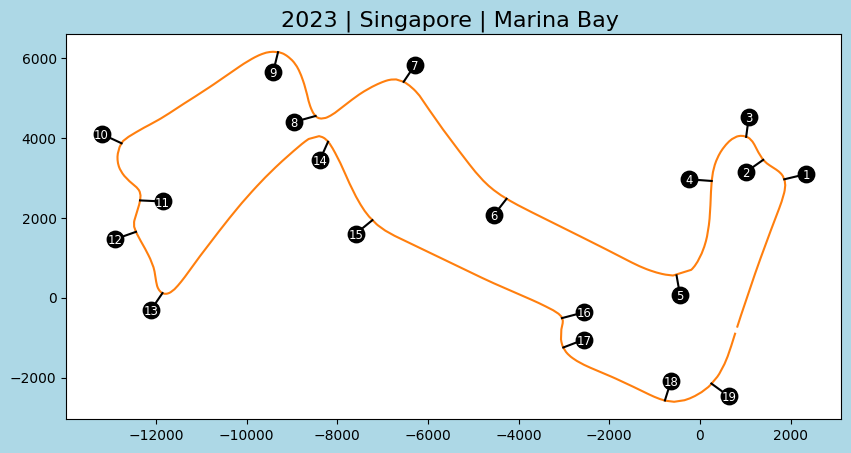

In [39]:
background_color = 'lightblue'
fig, ax = plt.subplots(figsize=(10,5), facecolor= background_color)

def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

track = pos.loc[:, ('X', 'Y')].to_numpy()

track_angle = circuit_info.rotation / 180 * np.pi

offset_vector = [500, 0] 

rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1], color ='tab:orange')

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    circle_color = 'black'
    plt.scatter(text_x, text_y, color=circle_color, s=140)


    # Draw a line from the track to this circle.
    line_color = 'black'
    plt.plot([track_x, text_x], [track_y, text_y], color=line_color)

    # Finally, print the corner number inside the circle.
    text_color = 'white'
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color=text_color)

    plot_title = f"{year} | {gp} | {session_event.event['Location']} "

    title_color = 'black'
    plt.title(plot_title, color=title_color, fontsize = 16)
